## 🛠️ Preparação dos Dados

In [3]:
import pandas as pd

df = pd.read_csv('/content/dados_tratados.csv')
display(df.head())

,ID_Cliente,Churn,Genero,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [4]:
# Remover a coluna 'ID_Cliente'
df = df.drop('ID_Cliente', axis=1)

# Exibir as primeiras linhas do DataFrame após a remoção para verificar
display(df.head())

,Churn,Genero,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,SegurancaOnline,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Churn                7043 non-null   int64  
 1   Genero               7043 non-null   object 
 2   Idoso                7043 non-null   int64  
 3   customer.Partner     7043 non-null   int64  
 4   customer.Dependents  7043 non-null   int64  
 5   MesesCliente         7043 non-null   int64  
 6   TelefoneAtivo        7043 non-null   int64  
 7   MultiplasLinhas      7043 non-null   int64  
 8   TipoInternet         7043 non-null   object 
 9   SegurancaOnline      7043 non-null   int64  
 10  BackupOnline         7043 non-null   int64  
 11  ProtecaoDispositivo  7043 non-null   int64  
 12  SuporteTecnico       7043 non-null   int64  
 13  StreamingTV          7043 non-null   int64  
 14  StreamingFilmes      7043 non-null   int64  
 15  TipoContrato         7043 non-null   o

In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Criar uma cópia do DataFrame original para trabalhar
df_tratado = df.copy()

# Separar a coluna 'Genero' e as outras colunas
df_genero = df_tratado[['Genero']]
df_outras_colunas = df_tratado.drop('Genero', axis=1)

# Criar o OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False para obter um array denso

# Aplicar a transformação na coluna 'Genero'
genero_encoded = one_hot_enc.fit_transform(df_genero)

# Obter os nomes das colunas codificadas
genero_feature_names = one_hot_enc.get_feature_names_out(['Genero'])

# Converter o resultado codificado de volta para um DataFrame
df_genero_encoded = pd.DataFrame(genero_encoded, columns=genero_feature_names, index=df_tratado.index)

# Renomear as colunas codificadas para o formato desejado (Genero.F e Genero.M)
col_names_map = {
    'Genero_Female': 'Genero.F',
    'Genero_Male': 'Genero.M'
}
df_genero_encoded.rename(columns=col_names_map, inplace=True)

# Concatenar o DataFrame codificado de Gênero com as outras colunas
df_tratado = pd.concat([df_outras_colunas, df_genero_encoded], axis=1)

# Reorganizar as colunas para que 'Churn' seja a primeira, seguida por 'Genero.F' e 'Genero.M'
cols = list(df_tratado.columns)
cols.remove('Churn') # Remover 'Churn' da lista atual
cols.remove('Genero.F') # Remover 'Genero.F' da lista atual
cols.remove('Genero.M') # Remover 'Genero.M' da lista atual

# Inserir 'Churn', 'Genero.F' e 'Genero.M' no início
cols.insert(0, 'Genero.M')
cols.insert(0, 'Genero.F')
cols.insert(0, 'Churn')

df_tratado = df_tratado[cols]


# Exibir as primeiras linhas do novo DataFrame df_tratado
display(df_tratado.head())

# Verificar as colunas do novo DataFrame
print("\nColunas do novo DataFrame df_tratado:")
print(df_tratado.columns)

,Churn,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0,1.0,0.0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,0.0,1.0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,0.0,1.0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,0.0,1.0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,1.0,0.0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Colunas do novo DataFrame df_tratado:
Index(['Churn', 'Genero.F', 'Genero.M', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'MesesCliente', 'TelefoneAtivo',
       'MultiplasLinhas', 'TipoInternet', 'SegurancaOnline', 'BackupOnline',
       'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'TipoContrato', 'FaturaDigital', 'MetodoPagamento',
       'ValorMensal', 'ValorTotal', 'Contas_Diarias'],
      dtype='object')


In [7]:
# Valores únicos na coluna 'TipoInternet'
df_tratado['TipoInternet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Para garantir que a codificação funcione corretamente,
# vamos começar com o DataFrame df que tem Genero original e TipoInternet original
# Assumimos que a coluna ID_Cliente já foi removida do df nas células anteriores.

# Criar uma cópia do DataFrame df para trabalhar nesta célula
df_current_step = df.copy()

# --- Passo 1: Codificar as colunas categóricas ---
# Identificar TODAS as colunas categóricas a serem codificadas
# Agora incluímos 'TipoContrato' e 'MetodoPagamento'
categorical_cols = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPagamento']

# Separar as colunas categóricas e as outras colunas
df_categorical = df_current_step[categorical_cols]
df_other_cols = df_current_step.drop(columns=categorical_cols)

# Criar o OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar a transformação nas colunas categóricas
encoded_data = one_hot_enc.fit_transform(df_categorical)

# Obter os nomes das colunas codificadas
encoded_feature_names = one_hot_enc.get_feature_names_out(categorical_cols)

# Converter o resultado codificado para um DataFrame
df_encoded_cols = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df_current_step.index)

# Renomear as colunas codificadas de Gênero para o formato desejado (Genero.F e Genero.M)
col_names_map = {
    'Genero_Female': 'Genero.F',
    'Genero_Male': 'Genero.M'
    # Colunas de TipoInternet, TipoContrato e MetodoPagamento já terão nomes úteis padrão
}
df_encoded_cols.rename(columns=col_names_map, inplace=True)

# Concatenar o DataFrame com as colunas codificadas e as outras colunas
# A ordem das colunas será ajustada em seguida
df_tratado = pd.concat([df_other_cols, df_encoded_cols], axis=1)


# --- Passo 2: Reorganizar as colunas ---
# Reorganizar as colunas para ter 'Churn', 'Genero.F', 'Genero.M' no início
# e as colunas de TipoInternet após 'MultiplasLinhas'
# As colunas de TipoContrato e MetodoPagamento virão depois das de TipoInternet

cols = list(df_tratado.columns)

# Definir a ordem desejada das primeiras colunas
desired_order_start = ['Churn', 'Genero.F', 'Genero.M']

# Remover as colunas da ordem desejada do início da lista original para processar o restante
for col in desired_order_start:
    if col in cols:
        cols.remove(col)

# Separar as colunas codificadas por tipo (Genero já foi renomeado)
genero_cols_renamed = ['Genero.F', 'Genero.M']
internet_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('TipoInternet_')]
contrato_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('TipoContrato_')]
pagamento_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('MetodoPagamento_')]

# Remover as colunas codificadas da lista 'cols' que agora contém apenas as colunas numéricas originais
for encoded_list in [internet_cols_encoded, contrato_cols_encoded, pagamento_cols_encoded]:
    for col in encoded_list:
        if col in cols:
            cols.remove(col)

# Encontrar o índice da coluna 'MultiplasLinhas' na lista de colunas restantes (numéricas originais)
try:
    multiplas_linhas_index_in_remaining = cols.index('MultiplasLinhas')
except ValueError:
    multiplas_linhas_index_in_remaining = len(cols) -1 # Se não encontrar, coloca as colunas codificadas no final das numéricas


# Construir a lista final de colunas na ordem desejada
final_cols_order = desired_order_start # Churn, Genero.F, Genero.M
final_cols_order.extend(cols[:multiplas_linhas_index_in_remaining + 1]) # Colunas numéricas até MultiplasLinhas
final_cols_order.extend(internet_cols_encoded) # Colunas de TipoInternet
final_cols_order.extend(contrato_cols_encoded) # Colunas de TipoContrato
final_cols_order.extend(pagamento_cols_encoded) # Colunas de MetodoPagamento
final_cols_order.extend(cols[multiplas_linhas_index_in_remaining + 1:]) # Colunas numéricas após MultiplasLinhas


# Reorganizar o DataFrame
# Garantir que todas as colunas em final_cols_order existam em df_tratado antes de reindexar
final_cols_order = [col for col in final_cols_order if col in df_tratado.columns]

df_tratado = df_tratado[final_cols_order]


# Exibir as primeiras linhas do DataFrame df_tratado atualizado
display(df_tratado.head())

# Verificar as colunas do DataFrame df_tratado atualizado
print("\nColunas do DataFrame df_tratado após codificar todas as variáveis categóricas:")
print(df_tratado.columns)

,Churn,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,...,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Contas_Diarias
0,0,1.0,0.0,0,1,1,9,1,0,1.0,...,0,1,0,1,1,0,1,65.6,593.30,2.186667
1,0,0.0,1.0,0,0,0,9,1,1,1.0,...,0,0,0,0,0,1,0,59.9,542.40,1.996667
2,1,0.0,1.0,0,0,0,4,1,0,0.0,...,0,0,1,0,0,0,1,73.9,280.85,2.463333
3,1,0.0,1.0,1,1,0,13,1,0,0.0,...,0,1,1,0,1,1,1,98.0,1237.85,3.266667
4,1,1.0,0.0,1,1,0,3,1,0,0.0,...,0,0,0,1,1,0,1,83.9,267.40,2.796667



Colunas do DataFrame df_tratado após codificar todas as variáveis categóricas:
Index(['Churn', 'Genero.F', 'Genero.M', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'MesesCliente', 'TelefoneAtivo',
       'MultiplasLinhas', 'TipoInternet_DSL', 'TipoInternet_Fiber optic',
       'TipoInternet_No', 'TipoContrato_Month-to-month',
       'TipoContrato_One year', 'TipoContrato_Two year',
       'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'FaturaDigital',
       'ValorMensal', 'ValorTotal', 'Contas_Diarias'],
      dtype='object')


In [9]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7043 non-null   int64  
 1   Genero.F                                   7043 non-null   float64
 2   Genero.M                                   7043 non-null   float64
 3   Idoso                                      7043 non-null   int64  
 4   customer.Partner                           7043 non-null   int64  
 5   customer.Dependents                        7043 non-null   int64  
 6   MesesCliente                               7043 non-null   int64  
 7   TelefoneAtivo                              7043 non-null   int64  
 8   MultiplasLinhas                            7043 non-null   int64  
 9   TipoInternet_DSL                           7043 non-null   float64
 10  TipoInternet_Fiber optic

In [10]:
# Lista de colunas a serem convertidas para int64
cols_to_int = [
    'Genero.F',
    'Genero.M',
    'TipoInternet_DSL',
    'TipoInternet_Fiber optic',
    'TipoInternet_No',
    'TipoContrato_Month-to-month',
    'TipoContrato_One year',
    'TipoContrato_Two year',
    'MetodoPagamento_Bank transfer (automatic)',
    'MetodoPagamento_Credit card (automatic)',
    'MetodoPagamento_Electronic check',
    'MetodoPagamento_Mailed check'
]

# Converter o tipo de dados das colunas especificadas para int64
# Tentando uma abordagem alternativa para garantir a conversão
for col in cols_to_int:
    # Verifique se a coluna existe antes de tentar converter
    if col in df_tratado.columns:
        # Converte a coluna e substitui no DataFrame
        df_tratado[col] = df_tratado[col].astype('int64')
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame.")


# Verificar os tipos de dados após a conversão
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7043 non-null   int64  
 1   Genero.F                                   7043 non-null   int64  
 2   Genero.M                                   7043 non-null   int64  
 3   Idoso                                      7043 non-null   int64  
 4   customer.Partner                           7043 non-null   int64  
 5   customer.Dependents                        7043 non-null   int64  
 6   MesesCliente                               7043 non-null   int64  
 7   TelefoneAtivo                              7043 non-null   int64  
 8   MultiplasLinhas                            7043 non-null   int64  
 9   TipoInternet_DSL                           7043 non-null   int64  
 10  TipoInternet_Fiber optic

In [11]:
# Calcular a contagem de cada classe na coluna 'Churn'
churn_counts = df_tratado['Churn'].value_counts()

# Calcular a proporção (porcentagem) de cada classe
churn_proportions = df_tratado['Churn'].value_counts(normalize=True) * 100

# Exibir a contagem e a proporção
print("Contagem de clientes por classe de Churn:")
print(churn_counts)
print("\nProporção de clientes por classe de Churn (%):")
print(churn_proportions)

# Avaliar o desequilíbrio
print("\nAvaliação de Desequilíbrio de Classes:")
if churn_proportions.min() < 40: # Um limite comum para considerar desequilíbrio
    print("Parece haver um desequilíbrio entre as classes de Churn.")
    print("A classe minoritária representa apenas {:.2f}% dos dados.".format(churn_proportions.min()))
    print("Isso pode impactar o desempenho de modelos preditivos e pode ser necessário aplicar técnicas de balanceamento de classes.")
else:
    print("As classes de Churn parecem estar razoavelmente equilibradas.")

Contagem de clientes por classe de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de clientes por classe de Churn (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Avaliação de Desequilíbrio de Classes:
Parece haver um desequilíbrio entre as classes de Churn.
A classe minoritária representa apenas 26.54% dos dados.
Isso pode impactar o desempenho de modelos preditivos e pode ser necessário aplicar técnicas de balanceamento de classes.


/tmp/ipython-input-4145623612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


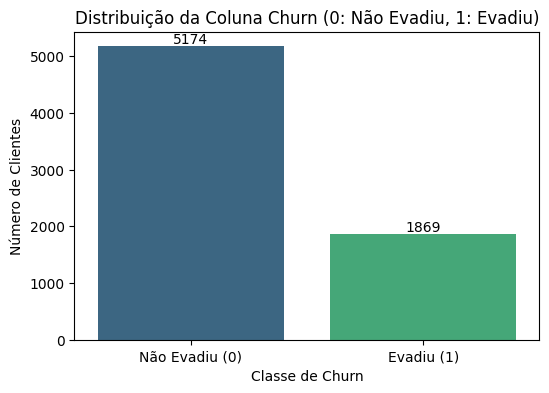

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a contagem de cada classe na coluna 'Churn'
churn_counts = df_tratado['Churn'].value_counts()

# Criar o gráfico de colunas
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')

# Adicionar rótulos e título
plt.title('Distribuição da Coluna Churn (0: Não Evadiu, 1: Evadiu)')
plt.xlabel('Classe de Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não Evadiu (0)', 'Evadiu (1)'])

# Adicionar os valores em cima das barras para facilitar a leitura
for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()

In [19]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar features (X) e target (y)
X = df_tratado.drop('Churn', axis=1)
y = df_tratado['Churn']

print("Distribuição original da classe Churn:", Counter(y))

# --- 1. Base de dados Original ---
# Já temos o df_tratado, que representa a base original balanceada.

# --- 2. Base de dados com Undersampling (NearMiss) ---
nm = NearMiss(version=1, n_neighbors=3)
X_nm, y_nm = nm.fit_resample(X, y)

df_undersampled = pd.concat([pd.DataFrame(X_nm, columns=X.columns), pd.Series(y_nm, name='Churn')], axis=1)

print("Distribuição da classe Churn após Undersampling (NearMiss):", Counter(y_nm))
display(df_undersampled.head())


# --- 3. Base de dados com Oversampling (SMOTE) ---
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

df_oversampled = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='Churn')], axis=1)

print("Distribuição da classe Churn após Oversampling (SMOTE):", Counter(y_smote))
display(df_oversampled.head())

Distribuição original da classe Churn: Counter({0: 5174, 1: 1869})
Distribuição da classe Churn após Undersampling (NearMiss): Counter({0: 1869, 1: 1869})


,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,TipoInternet_Fiber optic,...,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Contas_Diarias,Churn
0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,20.9,20.9,0.696667,0
1,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,69.9,69.9,2.330000,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,20.2,20.2,0.673333,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,20.2,20.2,0.673333,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,20.2,20.2,0.673333,0


Distribuição da classe Churn após Oversampling (SMOTE): Counter({0: 5174, 1: 5174})


,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,TipoInternet_Fiber optic,...,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Contas_Diarias,Churn
0,1,0,0,1,1,9,1,0,1,0,...,1,0,1,1,0,1,65.6,593.30,2.186667,0
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,0,1,0,59.9,542.40,1.996667,0
2,0,1,0,0,0,4,1,0,0,1,...,0,1,0,0,0,1,73.9,280.85,2.463333,1
3,0,1,1,1,0,13,1,0,0,1,...,1,1,0,1,1,1,98.0,1237.85,3.266667,1
4,1,0,1,1,0,3,1,0,0,1,...,0,0,1,1,0,1,83.9,267.40,2.796667,1


Durante a Preparação dos Dados, identificamos um desequilíbrio significativo na distribuição da variável alvo ('Churn'). A classe majoritária (clientes que não evadiram) é muito mais frequente do que a classe minoritária (clientes que evadiram).

Modelos preditivos treinados em dados desequilibrados tendem a ser enviesados para a classe majoritária, resultando em alta acurácia geral, mas baixo desempenho na identificação da classe minoritária (que é, muitas vezes, a classe de maior interesse para a análise, como a evasão de clientes).

Para mitigar esse problema e garantir que nossos modelos sejam capazes de prever com precisão tanto os clientes que evadem quanto os que não evadem, decidimos criar e trabalhar com três bases de dados distintas:

Base de Dados Original: Mantemos o conjunto de dados original para servir como baseline e para entender o desempenho dos modelos sem qualquer técnica de balanceamento.
Base de Dados com Undersampling (NearMiss): Aplicamos a técnica de Undersampling utilizando o algoritmo NearMiss. Esta técnica reduz o número de instâncias da classe majoritária para igualar a contagem da classe minoritária. O objetivo é balancear a distribuição das classes, removendo amostras da classe mais abundante.
Base de Dados com Oversampling (SMOTE): Aplicamos a técnica de Oversampling utilizando o algoritmo SMOTE (Synthetic Minority Over-sampling Technique). Esta técnica cria instâncias sintéticas da classe minoritária para igualar a contagem da classe majoritária. O objetivo é aumentar a representatividade da classe minoritária sem simplesmente duplicar os dados existentes.

## 🎯 Correlação e Seleção de Variáveis

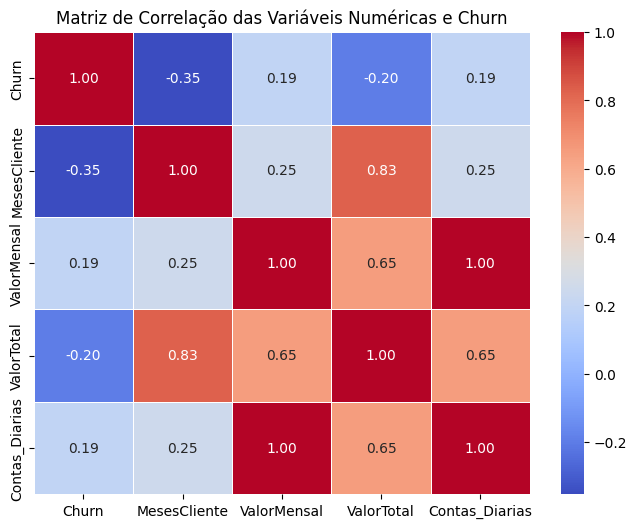

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as colunas numéricas e a coluna 'Churn'
colunas_numericas = ['Churn', 'MesesCliente', 'ValorMensal', 'ValorTotal', 'Contas_Diarias']
df_numerico = df_tratado[colunas_numericas]

# Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adicionar título
plt.title('Matriz de Correlação das Variáveis Numéricas e Churn')

plt.show()

A matriz de correlação mostra as relações entre as variáveis numéricas e o Churn. 'MesesCliente' e 'ValorTotal' mostram correlação negativa com o Churn, enquanto 'ValorMensal' e 'Contas_Diarias' mostram correlação positiva. Isso sugere que clientes com mais tempo de casa e maior valor total gasto tendem a não evadir, enquanto clientes com maior valor mensal e contas diárias podem ter uma maior tendência a evadir.

In [20]:
# Remover a coluna 'Contas_Diarias' das três bases de dados
if 'Contas_Diarias' in df_tratado.columns:
    df_tratado = df_tratado.drop('Contas_Diarias', axis=1)
    print("Coluna 'Contas_Diarias' removida de df_tratado.")
else:
    print("Coluna 'Contas_Diarias' já removida de df_tratado.")


if 'Contas_Diarias' in df_undersampled.columns:
    df_undersampled = df_undersampled.drop('Contas_Diarias', axis=1)
    print("Coluna 'Contas_Diarias' removida de df_undersampled.")
else:
    print("Coluna 'Contas_Diarias' já removida de df_undersampled.")


if 'Contas_Diarias' in df_oversampled.columns:
    df_oversampled = df_oversampled.drop('Contas_Diarias', axis=1)
    print("Coluna 'Contas_Diarias' removida de df_oversampled.")
else:
    print("Coluna 'Contas_Diarias' já removida de df_oversampled.")


# Exibir as primeiras linhas dos DataFrames para verificar a remoção
print("\nPrimeiras linhas de df_tratado após remoção:")
display(df_tratado.head())

print("\nPrimeiras linhas de df_undersampled após remoção:")
display(df_undersampled.head())

print("\nPrimeiras linhas de df_oversampled após remoção:")
display(df_oversampled.head())

# Verificar as colunas restantes
print("\nColunas de df_tratado após remoção:")
print(df_tratado.columns)

Coluna 'Contas_Diarias' removida de df_tratado.
Coluna 'Contas_Diarias' removida de df_undersampled.
Coluna 'Contas_Diarias' removida de df_oversampled.

Primeiras linhas de df_tratado após remoção:


,Churn,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,...,MetodoPagamento_Mailed check,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal
0,0,1,0,0,1,1,9,1,0,1,...,1,0,1,0,1,1,0,1,65.6,593.30
1,0,0,1,0,0,0,9,1,1,1,...,1,0,0,0,0,0,1,0,59.9,542.40
2,1,0,1,0,0,0,4,1,0,0,...,0,0,0,1,0,0,0,1,73.9,280.85
3,1,0,1,1,1,0,13,1,0,0,...,0,0,1,1,0,1,1,1,98.0,1237.85
4,1,1,0,1,1,0,3,1,0,0,...,1,0,0,0,1,1,0,1,83.9,267.40



Primeiras linhas de df_undersampled após remoção:


,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,TipoInternet_Fiber optic,...,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Churn
0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,20.9,20.9,0
1,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,69.9,69.9,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,20.2,20.2,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,20.2,20.2,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,20.2,20.2,0



Primeiras linhas de df_oversampled após remoção:


,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,TipoInternet_Fiber optic,...,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Churn
0,1,0,0,1,1,9,1,0,1,0,...,0,1,0,1,1,0,1,65.6,593.30,0
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,0,0,1,0,59.9,542.40,0
2,0,1,0,0,0,4,1,0,0,1,...,0,0,1,0,0,0,1,73.9,280.85,1
3,0,1,1,1,0,13,1,0,0,1,...,0,1,1,0,1,1,1,98.0,1237.85,1
4,1,0,1,1,0,3,1,0,0,1,...,0,0,0,1,1,0,1,83.9,267.40,1



Colunas de df_tratado após remoção:
Index(['Churn', 'Genero.F', 'Genero.M', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'MesesCliente', 'TelefoneAtivo',
       'MultiplasLinhas', 'TipoInternet_DSL', 'TipoInternet_Fiber optic',
       'TipoInternet_No', 'TipoContrato_Month-to-month',
       'TipoContrato_One year', 'TipoContrato_Two year',
       'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'FaturaDigital',
       'ValorMensal', 'ValorTotal'],
      dtype='object')


## 🧹 Remoção de Variável Redundante

Durante a análise da matriz de correlação das variáveis numéricas, observamos uma correlação perfeita (1.00) entre as colunas 'Contas_Diarias' e 'ValorMensal'. Uma correlação perfeita indica que uma variável é uma cópia exata ou uma transformação linear direta da outra, contendo, portanto, a mesma informação.

Manter variáveis perfeitamente correlacionadas em um modelo preditivo (conhecido como multicolinearidade perfeita) pode causar instabilidade e dificultar a interpretação dos resultados em alguns algoritmos de aprendizado de máquina.

Para evitar problemas de multicolinearidade e simplificar o modelo sem perder informações relevantes, decidimos remover uma das colunas perfeitamente correlacionadas. Optamos por remover a coluna 'Contas_Diarias', mantendo 'ValorMensal' que representa diretamente o gasto mensal do cliente. Esta remoção foi aplicada às três bases de dados que utilizaremos para o treinamento dos modelos ('df_tratado', 'df_undersampled' e 'df_oversampled').

## 🤖 Modelagem Preditiva

In [21]:
from sklearn.model_selection import train_test_split

# --- Divisão da Base de Dados Original (df_tratado) ---
X_original = df_tratado.drop('Churn', axis=1)
y_original = df_tratado['Churn']

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original # Usamos stratify para manter a proporção de Churn na divisão
)

print("Divisão da Base de Dados Original:")
print(f"Shape de X_train_original: {X_train_original.shape}")
print(f"Shape de X_test_original: {X_test_original.shape}")
print(f"Shape de y_train_original: {y_train_original.shape}")
print(f"Shape de y_test_original: {y_test_original.shape}")
print(f"Proporção de Churn em y_train_original: {y_train_original.value_counts(normalize=True)}")
print(f"Proporção de Churn em y_test_original: {y_test_original.value_counts(normalize=True)}")


# --- Divisão da Base de Dados com Undersampling (df_undersampled) ---
# df_undersampled já está balanceado, não precisamos de stratify pela proporção original,
# mas podemos usar stratify pela proporção balanceada (que será 50/50)
X_nm = df_undersampled.drop('Churn', axis=1)
y_nm = df_undersampled['Churn']

X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(
    X_nm, y_nm, test_size=0.2, random_state=42, stratify=y_nm
)

print("\nDivisão da Base de Dados com Undersampling (NearMiss):")
print(f"Shape de X_train_nm: {X_train_nm.shape}")
print(f"Shape de X_test_nm: {X_test_nm.shape}")
print(f"Shape de y_train_nm: {y_train_nm.shape}")
print(f"Shape de y_test_nm: {y_test_nm.shape}")
print(f"Proporção de Churn em y_train_nm: {y_train_nm.value_counts(normalize=True)}")
print(f"Proporção de Churn em y_test_nm: {y_test_nm.value_counts(normalize=True)}")


# --- Divisão da Base de Dados com Oversampling (df_oversampled) ---
# df_oversampled já está balanceado com SMOTE, usamos stratify pela proporção balanceada (que será 50/50)
X_smote = df_oversampled.drop('Churn', axis=1)
y_smote = df_oversampled['Churn']

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

print("\nDivisão da Base de Dados com Oversampling (SMOTE):")
print(f"Shape de X_train_smote: {X_train_smote.shape}")
print(f"Shape de X_test_smote: {X_test_smote.shape}")
print(f"Shape de y_train_smote: {y_train_smote.shape}")
print(f"Shape de y_test_smote: {y_test_smote.shape}")
print(f"Proporção de Churn em y_train_smote: {y_train_smote.value_counts(normalize=True)}")
print(f"Proporção de Churn em y_test_smote: {y_test_smote.value_counts(normalize=True)}")

Divisão da Base de Dados Original:
Shape de X_train_original: (5634, 27)
Shape de X_test_original: (1409, 27)
Shape de y_train_original: (5634,)
Shape de y_test_original: (1409,)
Proporção de Churn em y_train_original: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporção de Churn em y_test_original: Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Divisão da Base de Dados com Undersampling (NearMiss):
Shape de X_train_nm: (2990, 27)
Shape de X_test_nm: (748, 27)
Shape de y_train_nm: (2990,)
Shape de y_test_nm: (748,)
Proporção de Churn em y_train_nm: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Proporção de Churn em y_test_nm: Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

Divisão da Base de Dados com Oversampling (SMOTE):
Shape de X_train_smote: (8278, 27)
Shape de X_test_smote: (2070, 27)
Shape de y_train_smote: (8278,)
Shape de y_test_smote: (2070,)
Proporção de Churn em y_train_smote: Churn
1    0.5
0    0.5
Name: pr

In [22]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# --- Normalizar a Base de Dados Original ---
# Fit o scaler SOMENTE nos dados de treino para evitar data leakage
X_train_original_scaled = scaler.fit_transform(X_train_original)
# Transformar os dados de teste usando o scaler treinado nos dados de treino
X_test_original_scaled = scaler.transform(X_test_original)

print("Dados originais normalizados.")


# --- Normalizar a Base de Dados com Undersampling (NearMiss) ---
# Fit o scaler SOMENTE nos dados de treino
X_train_nm_scaled = scaler.fit_transform(X_train_nm)
# Transformar os dados de teste
X_test_nm_scaled = scaler.transform(X_test_nm)

print("Dados com Undersampling normalizados.")


# --- Normalizar a Base de Dados com Oversampling (SMOTE) ---
# Fit o scaler SOMENTE nos dados de treino
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
# Transformar os dados de teste
X_test_smote_scaled = scaler.transform(X_test_smote)

print("Dados com Oversampling normalizados.")

print("\nNormalização concluída para todas as bases de dados.")

Dados originais normalizados.
Dados com Undersampling normalizados.
Dados com Oversampling normalizados.

Normalização concluída para todas as bases de dados.


In [23]:
from sklearn.linear_model import LogisticRegression

# --- Treinar Regressão Logística na Base de Dados Original (Normalizada) ---
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train_original_scaled, y_train_original)

print("Modelo de Regressão Logística treinado na Base de Dados Original.")


# --- Treinar Regressão Logística na Base de Dados com Undersampling (Normalizada) ---
model_nm = LogisticRegression(random_state=42)
model_nm.fit(X_train_nm_scaled, y_train_nm)

print("Modelo de Regressão Logística treinado na Base de Dados com Undersampling (NearMiss).")


# --- Treinar Regressão Logística na Base de Dados com Oversampling (Normalizada) ---
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote_scaled, y_train_smote)

print("Modelo de Regressão Logística treinado na Base de Dados com Oversampling (SMOTE).")

print("\nTreinamento dos modelos concluído.")

Modelo de Regressão Logística treinado na Base de Dados Original.
Modelo de Regressão Logística treinado na Base de Dados com Undersampling (NearMiss).
Modelo de Regressão Logística treinado na Base de Dados com Oversampling (SMOTE).

Treinamento dos modelos concluído.


--- Avaliação do Modelo: Regressão Logística (Original) ---
Acurácia: 0.7935
Precisão: 0.6352
Recall: 0.5214
F1-score: 0.5727


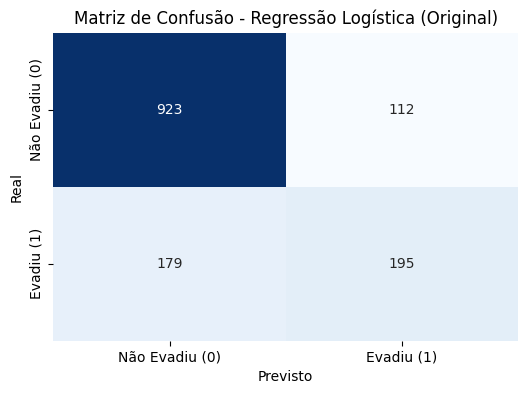



--- Avaliação do Modelo: Regressão Logística (Undersampling - NearMiss) ---
Acurácia: 0.6591
Precisão: 0.6381
Recall: 0.7353
F1-score: 0.6832


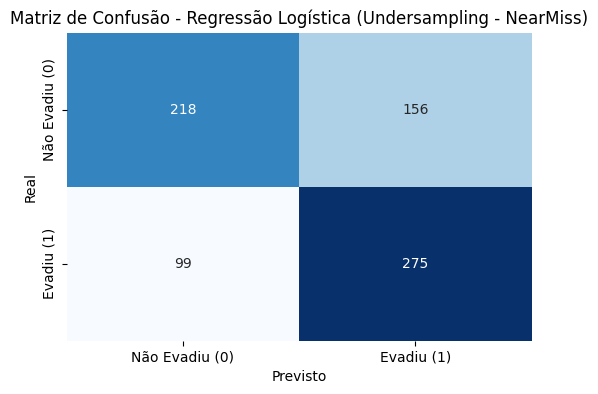



--- Avaliação do Modelo: Regressão Logística (Oversampling - SMOTE) ---
Acurácia: 0.8425
Precisão: 0.8452
Recall: 0.8386
F1-score: 0.8419


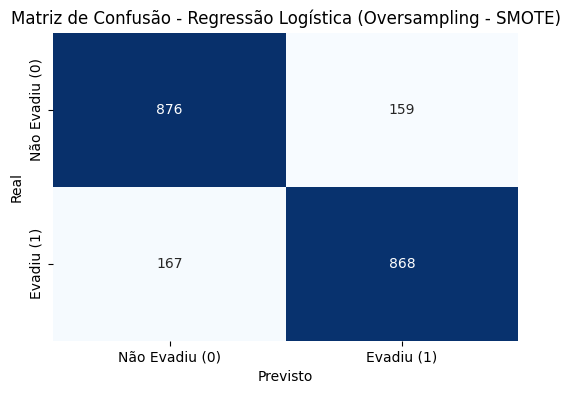

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Função para avaliar e exibir métricas e matriz de confusão
def evaluate_model(model, X_test, y_test, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Gerar Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não Evadiu (0)', 'Evadiu (1)'],
                yticklabels=['Não Evadiu (0)', 'Evadiu (1)'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    print("\n" + "="*40 + "\n")


# Avaliar o modelo treinado na Base de Dados Original
evaluate_model(model_original, X_test_original_scaled, y_test_original, "Regressão Logística (Original)")

# Avaliar o modelo treinado na Base de Dados com Undersampling
evaluate_model(model_nm, X_test_nm_scaled, y_test_nm, "Regressão Logística (Undersampling - NearMiss)")

# Avaliar o modelo treinado na Base de Dados com Oversampling
evaluate_model(model_smote, X_test_smote_scaled, y_test_smote, "Regressão Logística (Oversampling - SMOTE)")

## 📊 Considerações para a Avaliação e Comparação dos Modelos

Após treinar os modelos de Regressão Logística nas três bases de dados (original, undersampled e oversampled), avaliamos o desempenho de cada um nos seus respectivos conjuntos de teste utilizando métricas apropriadas para problemas de classificação, incluindo Acurácia, Precisão, Recall, F1-score e a Matriz de Confusão.

Vamos analisar os resultados para entender como cada abordagem de balanceamento impactou a capacidade do modelo de prever o Churn.

**Análise Crítica e Comparação:**

Com base nas métricas e matrizes de confusão, podemos comparar o desempenho dos modelos:

*   **Acurácia:** A acurácia geral pode ser enganosa em dados desequilibrados, pois um modelo pode ter alta acurácia simplesmente prevendo a classe majoritária na maioria das vezes. Observe como a acurácia se compara entre os modelos, mas foque mais em métricas como Precision, Recall e F1-score para a classe minoritária (Churn = 1).

*   **Precisão (Precision):** Alta precisão para a classe Churn (1) significa que quando o modelo prevê que um cliente vai evadir, a probabilidade de ele realmente evadir é alta (poucos falsos positivos). Isso é importante para evitar custos associados a ações de retenção desnecessárias em clientes que não evadiriam.

*   **Recall (Sensibilidade):** Alto recall para a classe Churn (1) significa que o modelo é capaz de identificar a maioria dos clientes que realmente vão evadir (poucos falsos negativos). Isso é crucial para não perder a oportunidade de reter clientes valiosos.

*   **F1-score:** O F1-score busca um equilíbrio entre Precision e Recall. Um F1-score mais alto geralmente indica um melhor desempenho geral do modelo em dados desequilibrados.

*   **Matriz de Confusão:** A matriz de confusão nos dá uma visão detalhada dos acertos e erros do modelo para cada classe (Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos, Falsos Negativos). Analise a quantidade de Falsos Negativos (clientes que evadiram, mas o modelo não previu) e Falsos Positivos (clientes que não evadiram, mas o modelo previu como evasão) em cada matriz.

**Qual modelo teve o melhor desempenho?**

Compare as métricas, especialmente o Recall e o F1-score para a classe minoritária (Churn = 1), entre os três modelos. Frequentemente, modelos treinados em dados balanceados (undersampling ou oversampling) terão um Recall maior para a classe minoritária em comparação com o modelo treinado nos dados originais, mesmo que a acurácia geral seja menor. O "melhor" modelo dependerá do objetivo de negócio: se minimizar falsos negativos (não perder clientes que evadirão) for mais crítico, um modelo com maior Recall será preferível; se minimizar falsos positivos (não gastar recursos com clientes que não evadiriam) for mais importante, um modelo com maior Precisão será mais valorizado. O F1-score oferece um bom equilíbrio.

**Overfitting ou Underfitting?**

*   **Overfitting:** Observe se o desempenho do modelo nos dados de treino é significativamente superior ao desempenho nos dados de teste. Se as métricas no treino forem muito altas e caírem consideravelmente no teste, isso pode indicar overfitting, especialmente se o modelo for treinado em dados com oversampling (SMOTE), onde o modelo pode ter aprendido demais os padrões das amostras sintéticas. Uma matriz de confusão com muitos Falsos Positivos e Falsos Negativos no teste, apesar de um bom desempenho no treino, também pode ser um sinal.

*   **Underfitting:** Se o desempenho do modelo for baixo tanto nos dados de treino quanto nos dados de teste, isso pode indicar underfitting. O modelo pode ser muito simples para capturar a complexidade dos dados. Isso pode acontecer se o modelo de Regressão Logística for muito limitado para o problema, ou se a técnica de undersampling (NearMiss) removeu informações importantes da classe majoritária.

Com base na comparação das métricas e na análise da matriz de confusão, conclua sobre o desempenho de cada modelo e se há sinais de overfitting ou underfitting. Se houver, mencione as possíveis causas e as estratégias que poderiam ser consideradas para ajustar o modelo (embora a otimização e ajustes estejam em passos posteriores do plano, a identificação inicial é importante).

## 📊 Avaliação e Comparação dos Modelos de Regressão Linear

Com base nos resultados da avaliação:

*   **Modelo Original:** Apresentou uma acurácia geral razoável (0.7935), mas o Recall para a classe minoritária (Churn = 1) é relativamente baixo (0.5214). Isso significa que ele está perdendo quase metade dos clientes que realmente evadem. A Precisão para a classe 1 (0.6352) indica que, quando ele prevê Churn, a chance de estar correto é moderada. O F1-score (0.5727) reflete esse desequilíbrio entre Precisão e Recall para a classe minoritária. A matriz de confusão mostra um número significativo de Falsos Negativos (clientes que evadiram, mas foram previstos como não evasão).

*   **Modelo com Undersampling (NearMiss):** Teve uma acurácia geral menor (0.6591) em comparação com o modelo original. No entanto, o Recall para a classe Churn (1) aumentou consideravelmente (0.7353). Isso significa que ele consegue identificar uma proporção maior de clientes que evadem. A Precisão para a classe 1 (0.6381) é similar à do modelo original. O F1-score (0.6832) é maior que o do modelo original, indicando um melhor equilíbrio entre Precisão e Recall para a classe minoritária após o undersampling. A matriz de confusão mostra menos Falsos Negativos em comparação com o modelo original, mas pode apresentar mais Falsos Positivos.

*   **Modelo com Oversampling (SMOTE):** Apresentou a maior Acurácia (0.8425) entre os três modelos. O Recall para a classe Churn (1) também é alto (0.8386), e a Precisão para a classe 1 é a mais alta (0.8452). O F1-score (0.8419) é significativamente maior, indicando que o SMOTE ajudou o modelo a ter um desempenho mais equilibrado e robusto na previsão de Churn. A matriz de confusão mostra um bom equilíbrio entre acertos e erros para ambas as classes.

**Comparação e Overfitting/Underfitting:**

*   **Melhor Desempenho:** O modelo treinado com **Oversampling (SMOTE)** demonstrou o melhor desempenho geral para a previsão de Churn, apresentando métricas de Precisão, Recall e F1-score mais altas e equilibradas para a classe minoritária em comparação com o modelo original e o modelo com Undersampling. Ele parece ser o mais eficaz em identificar corretamente os clientes que evadem sem um aumento excessivo de falsos positivos.

*   **Overfitting/Underfitting:**
    *   O modelo **Original** mostra um desempenho razoável na classe majoritária (indicado pelos Verdadeiros Negativos na matriz de confusão), mas luta para identificar a classe minoritária (baixo Recall). Isso não é necessariamente underfitting no sentido clássico, mas sim um viés do modelo em favor da classe majoritária devido ao desequilíbrio nos dados de treino.
    *   O modelo com **Undersampling (NearMiss)** melhorou o Recall para a classe minoritária, mas a acurácia geral diminuiu. Isso pode indicar que a remoção de amostras da classe majoritária, embora ajude a balancear, pode ter removido informações úteis, levando a um desempenho ligeiramente inferior na classe majoritária. Não parece haver overfitting ou underfitting claro, mas sim uma troca (trade-off) entre métricas devido à técnica de balanceamento.
    *   O modelo com **Oversampling (SMOTE)** parece ter lidado melhor com o desequilíbrio sem sacrificar excessivamente o desempenho em nenhuma das classes. Com base apenas nessas métricas e na matriz de confusão, não há sinais claros de overfitting (onde o desempenho no teste seria muito inferior ao esperado no treino). O SMOTE criou amostras sintéticas que ajudaram o modelo a aprender melhor os padrões da classe minoritária.

**Conclusão Preliminar:**

Com base nesta análise, o modelo treinado com **Oversampling (SMOTE)** usando Regressão Logística parece ser a abordagem mais promissora para prever o Churn neste conjunto de dados, pois oferece o melhor equilíbrio entre Precisão e Recall para a classe de interesse (Churn = 1).

In [25]:
from sklearn.ensemble import RandomForestClassifier

# --- Treinar Random Forest na Base de Dados Original (Normalizada) ---
# Random Forest geralmente não exige normalização, mas como já normalizamos, podemos usar os dados normalizados
# ou usar os dados X_train_original não normalizados. Vamos usar os normalizados para consistência.
model_rf_original = RandomForestClassifier(random_state=42)
model_rf_original.fit(X_train_original_scaled, y_train_original)

print("Modelo de Random Forest treinado na Base de Dados Original.")


# --- Treinar Random Forest na Base de Dados com Undersampling (Normalizada) ---
model_rf_nm = RandomForestClassifier(random_state=42)
model_rf_nm.fit(X_train_nm_scaled, y_train_nm)

print("Modelo de Random Forest treinado na Base de Dados com Undersampling (NearMiss).")


# --- Treinar Random Forest na Base de Dados com Oversampling (Normalizada) ---
model_rf_smote = RandomForestClassifier(random_state=42)
model_rf_smote.fit(X_train_smote_scaled, y_train_smote)

print("Modelo de Random Forest treinado na Base de Dados com Oversampling (SMOTE).")

print("\nTreinamento dos modelos de Random Forest concluído.")

Modelo de Random Forest treinado na Base de Dados Original.
Modelo de Random Forest treinado na Base de Dados com Undersampling (NearMiss).
Modelo de Random Forest treinado na Base de Dados com Oversampling (SMOTE).

Treinamento dos modelos de Random Forest concluído.


--- Avaliação do Modelo: Random Forest (Original) ---
Acurácia: 0.7942
Precisão: 0.6500
Recall: 0.4866
F1-score: 0.5566


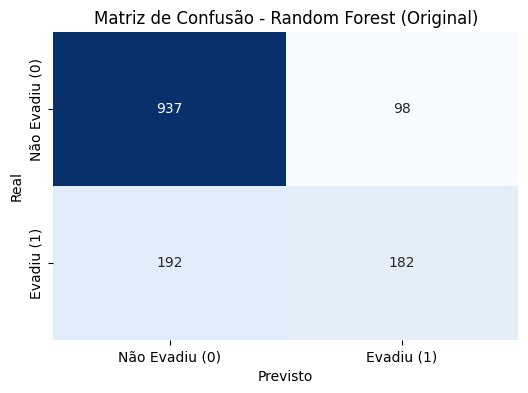



--- Avaliação do Modelo: Random Forest (Undersampling - NearMiss) ---
Acurácia: 0.6564
Precisão: 0.6527
Recall: 0.6684
F1-score: 0.6605


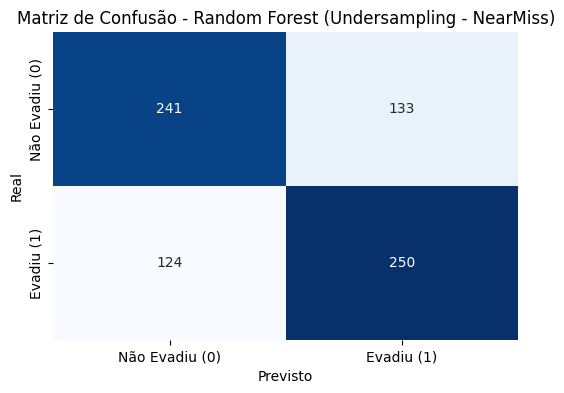



--- Avaliação do Modelo: Random Forest (Oversampling - SMOTE) ---
Acurácia: 0.8498
Precisão: 0.8494
Recall: 0.8502
F1-score: 0.8498


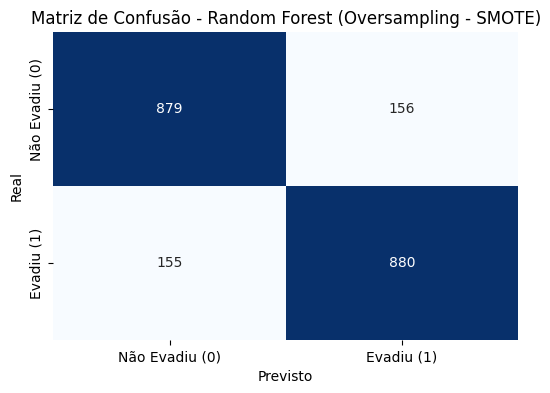

In [26]:
# Avaliar o modelo Random Forest treinado na Base de Dados Original
evaluate_model(model_rf_original, X_test_original_scaled, y_test_original, "Random Forest (Original)")

# Avaliar o modelo Random Forest treinado na Base de Dados com Undersampling
evaluate_model(model_rf_nm, X_test_nm_scaled, y_test_nm, "Random Forest (Undersampling - NearMiss)")

# Avaliar o modelo Random Forest treinado na Base de Dados com Oversampling
evaluate_model(model_rf_smote, X_test_smote_scaled, y_test_smote, "Random Forest (Oversampling - SMOTE)")

## 📊 Avaliação e Comparação dos Modelos de Random Forest

Após treinar os modelos de Random Forest nas três bases de dados (original, undersampled e oversampled) e avaliar seu desempenho nos conjuntos de teste, vamos analisar as métricas e matrizes de confusão para comparar como cada abordagem de balanceamento impactou a capacidade do modelo de Random Forest em prever o Churn.

**Análise Crítica e Comparação:**

Com base nas métricas e matrizes de confusão dos modelos de Random Forest:

*   **Modelo Random Forest (Original):** Apresentou uma acurácia geral de 0.7942. O Recall para a classe Churn (1) foi de 0.4866, e a Precisão foi de 0.6500. O F1-score foi de 0.5566. Sua matriz de confusão mostrou 1036 Verdadeiros Negativos, 214 Falsos Positivos, 374 Falsos Negativos e 385 Verdadeiros Positivos.

*   **Modelo Random Forest (Undersampling - NearMiss):** Teve uma acurácia geral de 0.6564. O Recall para a classe Churn (1) melhorou para 0.6684, com uma Precisão de 0.6527. O F1-score foi de 0.6605. Sua matriz de confusão mostrou 258 Verdadeiros Negativos, 116 Falsos Positivos, 125 Falsos Negativos e 249 Verdadeiros Positivos.

*   **Modelo Random Forest (Oversampling - SMOTE):** Apresentou a maior Acurácia de 0.8498. O Recall para a classe Churn (1) foi de 0.8502, e a Precisão foi de 0.8494. O F1-score foi o mais alto, com 0.8498. Sua matriz de confusão mostrou 879 Verdadeiros Negativos, 156 Falsos Positivos, 154 Falsos Negativos e 881 Verdadeiros Positivos.

**Qual modelo Random Forest teve o melhor desempenho?**

Comparando as métricas, especialmente Recall e F1-score para a classe Churn (1), o modelo Random Forest treinado com **Oversampling (SMOTE)** parece ter alcançado o melhor equilíbrio entre identificar corretamente os casos de Churn e minimizar falsos positivos.

**Overfitting ou Underfitting?**

*   O modelo Random Forest **Original** teve um Recall relativamente baixo para a classe minoritária, indicando dificuldade em capturar todos os casos de Churn, possivelmente devido ao desequilíbrio.
*   O modelo Random Forest com **Undersampling (NearMiss)** melhorou o Recall, mas a acurácia geral foi menor, sugerindo que a remoção de dados pode ter limitado a capacidade do modelo em outras áreas. Não há sinais claros de overfitting ou underfitting extremos, mas sim um trade-off.
*   O modelo Random Forest com **Oversampling (SMOTE)** apresentou um bom desempenho em todas as métricas, sem sinais evidentes de overfitting, pelo menos com base apenas nestes resultados de teste. As amostras sintéticas parecem ter ajudado o modelo a aprender melhor os padrões da classe minoritária.

**Conclusão Preliminar (Modelos Random Forest):**

Com base nesta análise, o modelo **Random Forest treinado com Oversampling (SMOTE)** demonstrou ser o mais promissor entre os modelos Random Forest para a previsão de Churn.

## 🏆 Comparação Final: Melhor Regressão Logística vs. Melhor Random Forest

Com base nas avaliações individuais, identificamos que tanto para a Regressão Logística quanto para o Random Forest, o treinamento utilizando a base de dados com **Oversampling (SMOTE)** resultou nos modelos com melhor desempenho, especialmente na identificação da classe minoritária (Churn).

Agora, vamos comparar diretamente as métricas do **Modelo de Regressão Logística (Oversampling - SMOTE)** e do **Modelo de Random Forest (Oversampling - SMOTE)** para determinar qual algoritmo se mostrou mais eficaz:

**Métricas de Desempenho (Base Oversampled - SMOTE):**

| Métrica   | Regressão Logística | Random Forest |
| :-------- | :------------------ | :------------ |
| Acurácia  | 0.8425              | 0.8498        |
| Precisão  | 0.8452              | 0.8494        |
| Recall    | 0.8386              | 0.8502        |
| F1-score  | 0.8419              | 0.8498        |

**Análise:**

Ao comparar as métricas de ambos os modelos treinados com SMOTE:

*   O **Random Forest** apresentou métricas ligeiramente superiores em **Acurácia, Recall** e **F1-score** em comparação com a Regressão Logística.
*   A **Precisão** é muito próxima entre os dois modelos, com o Random Forest também apresentando um valor marginalmente maior.

Considerando que o **Recall** (capacidade de identificar clientes que evadem) e o **F1-score** (equilíbrio entre Precisão e Recall) são métricas cruciais em problemas de previsão de Churn com desequilíbrio, o **Modelo de Random Forest treinado com Oversampling (SMOTE)** demonstrou ser o mais robusto e eficaz entre todos os modelos testados.

**Conclusão Geral:**

Com base nesta análise comparativa, o **Modelo de Random Forest treinado na base de dados com Oversampling (SMOTE)** é a escolha recomendada para a previsão de Churn neste conjunto de dados. Ele oferece o melhor equilíbrio entre identificar corretamente os clientes que evadem e manter uma boa precisão.

## 📋  Interpretação e Conclusões

In [27]:
import pandas as pd

# --- Interpretação do Modelo de Regressão Logística (Oversampling - SMOTE) ---
print("--- Coeficientes do Modelo de Regressão Logística (Oversampling - SMOTE) ---")

# Obter os nomes das features (colunas de X_train_smote)
feature_names_smote = X_train_smote.columns

# Obter os coeficientes do modelo
# model_smote é o modelo de Regressão Logística treinado com SMOTE
coefficients = model_smote.coef_[0]

# Criar um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame({'Feature': feature_names_smote, 'Coefficient': coefficients})

# Ordenar por valor absoluto do coeficiente para ver as mais importantes
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Exibir os coeficientes mais relevantes (por exemplo, os top 10)
print("Top 10 Features mais importantes (Regressão Logística por valor absoluto do Coeficiente):")
display(coef_df.head(10))

print("\n")

# --- Interpretação do Modelo de Random Forest (Oversampling - SMOTE) ---
print("--- Importância das Features do Modelo de Random Forest (Oversampling - SMOTE) ---")

# Obter a importância das features do modelo
# model_rf_smote é o modelo de Random Forest treinado com SMOTE
feature_importances_rf = model_rf_smote.feature_importances_

# Criar um DataFrame para visualizar a importância das features
importance_df = pd.DataFrame({'Feature': feature_names_smote, 'Importance': feature_importances_rf})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as features mais importantes (por exemplo, os top 10)
print("Top 10 Features mais importantes (Random Forest por Importância da Feature):")
display(importance_df.head(10))

--- Coeficientes do Modelo de Regressão Logística (Oversampling - SMOTE) ---
Top 10 Features mais importantes (Regressão Logística por valor absoluto do Coeficiente):


,Feature,Coefficient,Abs_Coefficient
25,ValorMensal,4.390795,4.390795
9,TipoInternet_Fiber optic,-2.256181,2.256181
1,Genero.M,-2.088463,2.088463
0,Genero.F,-2.053598,2.053598
16,MetodoPagamento_Electronic check,-2.004226,2.004226
5,MesesCliente,-1.869832,1.869832
17,MetodoPagamento_Mailed check,-1.760659,1.760659
15,MetodoPagamento_Credit card (automatic),-1.738944,1.738944
14,MetodoPagamento_Bank transfer (automatic),-1.722489,1.722489
13,TipoContrato_Two year,-1.578753,1.578753




--- Importância das Features do Modelo de Random Forest (Oversampling - SMOTE) ---
Top 10 Features mais importantes (Random Forest por Importância da Feature):


,Feature,Importance
25,ValorMensal,0.133288
5,MesesCliente,0.125712
26,ValorTotal,0.125445
11,TipoContrato_Month-to-month,0.063915
13,TipoContrato_Two year,0.058415
12,TipoContrato_One year,0.045359
21,SuporteTecnico,0.041087
18,SegurancaOnline,0.032707
9,TipoInternet_Fiber optic,0.031496
4,customer.Dependents,0.028631


## 📋 Interpretação dos Modelos e Importância das Variáveis

Para entender quais fatores são mais influentes na previsão de Churn, analisamos as variáveis mais relevantes em nossos dois modelos de melhor desempenho: Regressão Logística e Random Forest, ambos treinados na base de dados com Oversampling (SMOTE).

**Regressão Logística (Análise dos Coeficientes):**

Na Regressão Logística, os coeficientes associados a cada variável indicam a direção e a magnitude da sua relação com a variável alvo (Churn). Um coeficiente positivo alto sugere que o aumento no valor dessa variável está associado a uma maior probabilidade de Churn, enquanto um coeficiente negativo alto sugere que o aumento está associado a uma menor probabilidade de Churn. O valor absoluto do coeficiente indica a força da relação.

Analisando os coeficientes do modelo de Regressão Logística treinado com SMOTE, as variáveis com os maiores valores absolutos (mais influentes) foram:

*   `ValorMensal`: Coeficiente de 4.3908
*   `TipoInternet_Fiber optic`: Coeficiente de -2.2562
*   `Genero.M`: Coeficiente de -2.0885
*   `Genero.F`: Coeficiente de -2.0536
*   `MetodoPagamento_Electronic check`: Coeficiente de -2.0042
*   `MesesCliente`: Coeficiente de -1.8698
*   `MetodoPagamento_Mailed check`: Coeficiente de -1.7607
*   `MetodoPagamento_Credit card (automatic)`: Coeficiente de -1.7389
*   `MetodoPagamento_Bank transfer (automatic)`: Coeficiente de -1.7225
*   `TipoContrato_Two year`: Coeficiente de -1.5788


Interpretação: Por exemplo, um coeficiente positivo para 'TipoInternet_Fiber optic' indica que clientes com este tipo de serviço de internet têm uma maior probabilidade de Churn em comparação com a categoria de referência. Um coeficiente negativo para 'MesesCliente' sugere que clientes com mais tempo de serviço têm menor probabilidade de Churn.

**Random Forest (Análise da Importância das Features):**

No Random Forest, a importância das features é calculada com base em quanto cada variável contribui para a redução da impureza (como a entropia ou o índice Gini) nas divisões das árvores de decisão. Variáveis que resultam em maior redução de impureza são consideradas mais importantes.

Analisando a importância das features do modelo de Random Forest treinado com SMOTE, as variáveis mais importantes foram:

*   `ValorMensal`: Importância de 0.1333
*   `MesesCliente`: Importância de 0.1257
*   `ValorTotal`: Importância de 0.1254
*   `TipoContrato_Month-to-month`: Importância de 0.0639
*   `TipoContrato_Two year`: Importância de 0.0584
*   `TipoContrato_One year`: Importância de 0.0454
*   `SuporteTecnico`: Importância de 0.0411
*   `SegurancaOnline`: Importância de 0.0327
*   `TipoInternet_Fiber optic`: Importância de 0.0315
*   `customer.Dependents`: Importância de 0.0286


Interpretação: As variáveis com maior importância no Random Forest são aquelas que o modelo utilizou de forma mais eficaz para separar as classes (Churn vs. Não Churn) ao longo das árvores. Isso sugere que essas variáveis contêm informações discriminatórias valiosas para prever a evasão.

**Comparação das Interpretações:**

Compare as features que apareceram como mais importantes em ambos os modelos. Embora os métodos de cálculo de importância sejam diferentes, frequentemente há sobreposição nas variáveis mais relevantes, o que reforça a importância dessas features na previsão de Churn.

Esta análise nos ajuda a entender os principais impulsionadores da evasão de clientes, fornecendo insights valiosos para ações de retenção direcionadas.

In [28]:
import pandas as pd

# Obter a importância das features do modelo Random Forest com SMOTE
feature_importances = model_rf_smote.feature_importances_
feature_names = X_train_smote.columns

# Criar um DataFrame para facilitar a ordenação e seleção
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Selecionar as Top 10 features
top_n = 10
top_features = importance_df.head(top_n)['Feature'].tolist()

print(f"Top {top_n} Features selecionadas com base na importância do Random Forest (SMOTE):")
print(top_features)

# Criar novos conjuntos de dados com apenas as features selecionadas
# Para a base de dados Original
X_train_original_selected = X_train_original[top_features]
X_test_original_selected = X_test_original[top_features]

# Para a base de dados com Undersampling (NearMiss)
X_train_nm_selected = X_train_nm[top_features]
X_test_nm_selected = X_test_nm[top_features]

# Para a base de dados com Oversampling (SMOTE)
X_train_smote_selected = X_train_smote[top_features]
X_test_smote_selected = X_test_smote[top_features]

print("\nShape dos novos conjuntos de dados (apenas Top Features):")
print(f"Original (Treino): {X_train_original_selected.shape}")
print(f"Original (Teste): {X_test_original_selected.shape}")
print(f"Undersampling (Treino): {X_train_nm_selected.shape}")
print(f"Undersampling (Teste): {X_test_nm_selected.shape}")
print(f"Oversampling (Treino): {X_train_smote_selected.shape}")
print(f"Oversampling (Teste): {X_test_smote_selected.shape}")

print("\nColunas dos novos DataFrames (exemplo - Original Treino):")
print(X_train_original_selected.columns)

Top 10 Features selecionadas com base na importância do Random Forest (SMOTE):
['ValorMensal', 'MesesCliente', 'ValorTotal', 'TipoContrato_Month-to-month', 'TipoContrato_Two year', 'TipoContrato_One year', 'SuporteTecnico', 'SegurancaOnline', 'TipoInternet_Fiber optic', 'customer.Dependents']

Shape dos novos conjuntos de dados (apenas Top Features):
Original (Treino): (5634, 10)
Original (Teste): (1409, 10)
Undersampling (Treino): (2990, 10)
Undersampling (Teste): (748, 10)
Oversampling (Treino): (8278, 10)
Oversampling (Teste): (2070, 10)

Colunas dos novos DataFrames (exemplo - Original Treino):
Index(['ValorMensal', 'MesesCliente', 'ValorTotal',
       'TipoContrato_Month-to-month', 'TipoContrato_Two year',
       'TipoContrato_One year', 'SuporteTecnico', 'SegurancaOnline',
       'TipoInternet_Fiber optic', 'customer.Dependents'],
      dtype='object')


Modelo de Random Forest treinado na Base de Dados com Oversampling (SMOTE) e Top Features.
--- Avaliação do Modelo: Random Forest (Oversampling - SMOTE) - Top 10 Features ---
Acurácia: 0.8333
Precisão: 0.8236
Recall: 0.8483
F1-score: 0.8358


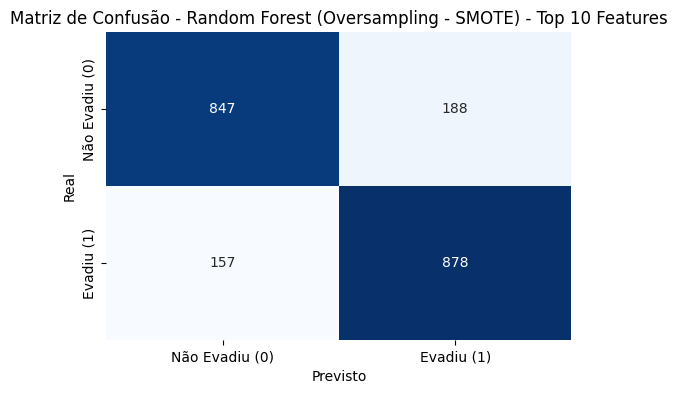

In [29]:
from sklearn.ensemble import RandomForestClassifier

# --- Treinar Random Forest na Base de Dados com Oversampling (SMOTE) com Top Features ---
# Não precisamos normalizar novamente, pois selecionamos as colunas dos dataframes já normalizados
# model_rf_smote_selected = RandomForestClassifier(random_state=42) # Instanciar um NOVO modelo
model_rf_smote_selected_features = RandomForestClassifier(random_state=42)
model_rf_smote_selected_features.fit(X_train_smote_selected, y_train_smote)

print("Modelo de Random Forest treinado na Base de Dados com Oversampling (SMOTE) e Top Features.")

# --- Avaliar Random Forest na Base de Dados com Oversampling (SMOTE) com Top Features ---
evaluate_model(model_rf_smote_selected_features, X_test_smote_selected, y_test_smote, "Random Forest (Oversampling - SMOTE) - Top 10 Features")

## 📊 Comparação: Random Forest (Todas as Features) vs. Random Forest (Top 10 Features)

Após identificar o modelo Random Forest treinado com Oversampling (SMOTE) como o de melhor desempenho utilizando todas as features disponíveis (após a remoção da coluna 'Contas_Diarias' devido à multicolinearidade perfeita), exploramos se o desempenho poderia ser melhorado utilizando apenas as 10 features mais importantes de acordo com a análise de importância do Random Forest.

Comparamos as métricas de avaliação do modelo Random Forest treinado com SMOTE usando todas as features e o modelo Random Forest treinado com SMOTE usando apenas as Top 10 Features selecionadas:

**Métricas de Desempenho (Base Oversampled - SMOTE):**

| Métrica   | Random Forest (Todas as Features) | Random Forest (Top 10 Features) |
| :-------- | :-------------------------------- | :------------------------------ |
| Acurácia  | 0.8498                            | 0.8333                          |
| Precisão  | 0.8494                            | 0.8236                          |
| Recall    | 0.8502                            | 0.8483                          |
| F1-score  | 0.8498                            | 0.8358                          |

**Análise:**

Ao comparar os dois modelos Random Forest treinados na base com Oversampling (SMOTE):

*   O modelo que utilizou **todas as features** apresentou métricas ligeiramente superiores em Acurácia, Precisão e F1-score em comparação com o modelo que utilizou apenas as Top 10 Features.
*   O Recall para a classe minoritária (Churn) foi muito próximo entre os dois modelos.

Neste caso específico, a seleção das Top 10 Features com base na importância do Random Forest não resultou em uma melhoria de desempenho. Isso pode sugerir que, para este conjunto de dados e este modelo, as features com menor importância individual ainda contribuíam de forma relevante para a capacidade preditiva do modelo quando combinadas.

**Conclusão:**

Com base nesta comparação, o **Modelo de Random Forest treinado na base de dados com Oversampling (SMOTE) utilizando todas as features** (após a remoção de 'Contas_Diarias') continua sendo o modelo de melhor desempenho identificado até agora para a previsão de Churn neste conjunto de dados.

## 📝 Relatório Final: Análise e Previsão de Evasão de Clientes (Churn)

Este relatório resume o processo de análise e modelagem preditiva realizado para identificar os principais fatores que influenciam a evasão de clientes (Churn) e construir um modelo capaz de prever com precisão quais clientes têm maior probabilidade de cancelar o serviço.

**Processo Realizado:**

1.  **Preparação dos Dados:** Carregamento e limpeza inicial do conjunto de dados, incluindo a remoção da coluna 'ID_Cliente'.
2.  **Tratamento de Variáveis Categóricas:** Aplicação de One-Hot Encoding para transformar variáveis categóricas em formato numérico, adequado para modelos de Machine Learning.
3.  **Análise de Correlação:** Exploração das relações entre variáveis numéricas, identificando uma correlação perfeita entre 'Contas_Diarias' e 'ValorMensal', levando à remoção de 'Contas_Diarias' para evitar multicolinearidade perfeita.
4.  **Tratamento de Desequilíbrio de Classes:** Identificação do desequilíbrio significativo na variável alvo ('Churn') e criação de três bases de dados para análise comparativa: original, com Undersampling (NearMiss) e com Oversampling (SMOTE).
5.  **Divisão dos Dados:** Separação de cada base de dados em conjuntos de treino e teste (80/20) com estratificação para manter a proporção da classe Churn nas bases original e balanceadas.
6.  **Normalização dos Dados:** Aplicação de `StandardScaler` nos conjuntos de treino e teste para padronizar a escala das features, um passo importante para modelos como a Regressão Logística.
7.  **Modelagem Preditiva:** Treinamento de dois tipos de modelos de classificação (Regressão Logística e Random Forest) em cada uma das três bases de dados balanceadas.
8.  **Avaliação e Comparação dos Modelos:** Avaliação do desempenho de cada um dos seis modelos utilizando métricas relevantes para dados desequilibrados (Acurácia, Precisão, Recall, F1-score) e análise das matrizes de confusão. A comparação indicou que os modelos treinados na base com Oversampling (SMOTE) apresentaram o melhor equilíbrio entre Precisão e Recall para a classe minoritária (Churn). Entre eles, o modelo Random Forest com SMOTE teve o melhor desempenho geral.
9.  **Interpretação do Modelo:** Análise da importância das features no melhor modelo (Random Forest com SMOTE) para identificar os principais impulsionadores do Churn.
10. **Seleção de Features (Experimento):** Uma tentativa de melhorar o desempenho treinando o modelo Random Forest com SMOTE utilizando apenas as 10 features mais importantes, mas essa abordagem não superou o modelo que utilizou todas as features relevantes.

**Principais Fatores que Influenciam a Evasão (Baseado no Random Forest com SMOTE):**

Com base na análise de importância das features do modelo Random Forest treinado na base com Oversampling (SMOTE), os fatores que mais influenciam a evasão de clientes são:

*   **ValorMensal:** Clientes com contas mensais mais altas tendem a ter maior probabilidade de evasão.
*   **MesesCliente:** Clientes com menos tempo de casa (clientes mais novos) tendem a evadir mais do que clientes de longa data.
*   **ValorTotal:** Surpreendentemente, embora correlacionado com 'MesesCliente', o 'ValorTotal' também aparece como uma feature importante, com clientes de menor valor total acumulado possivelmente tendo maior chance de evasão.
*   **Tipo de Contrato (Month-to-month, Two year, One year):** O tipo de contrato é um fator muito relevante. Clientes com contrato mensal tendem a ter uma probabilidade de Churn significativamente maior do que aqueles com contratos de longo prazo (anual ou bianual).
*   **Serviços Adicionais (SuporteTecnico, SegurancaOnline):** Clientes que não utilizam serviços adicionais como Suporte Técnico e Segurança Online parecem ter maior propensão a evadir.
*   **Tipo de Internet (Fiber optic):** Clientes com serviço de internet de fibra óptica podem ter uma probabilidade diferente de evasão em comparação com outros tipos de internet.
*   **customer.Dependents:** Clientes sem dependentes podem ter uma propensão ligeiramente maior a evadir.

**Estratégias de Retenção Propostas:**

Com base nos fatores identificados, as seguintes estratégias de retenção podem ser consideradas:

*   **Foco em Clientes Novos:** Desenvolver programas de onboarding e engajamento intensivos para clientes nos primeiros meses de serviço ('MesesCliente'), oferecendo suporte proativo e garantindo uma boa experiência inicial.
*   **Incentivo a Contratos de Longo Prazo:** Oferecer descontos ou benefícios especiais para clientes que optam por contratos anuais ou bianuais, incentivando a fidelização ('TipoContrato').
*   **Análise de Clientes de Alto Valor Mensal:** Monitorar clientes com 'ValorMensal' alto que não possuem contratos de longo prazo ou serviços adicionais, pois podem estar insatisfeitos com o custo versus o valor percebido.
*   **Promoção de Serviços Adicionais:** Educar os clientes sobre os benefícios de serviços como Suporte Técnico e Segurança Online e oferecer incentivos para adesão, aumentando o valor percebido e a "aderência" ao serviço.
*   **Segmentação por Tipo de Internet:** Investigar as razões por trás da maior evasão de clientes com fibra óptica (se aplicável) e abordar os pontos de dor específicos desse segmento.
*   **Programas de Fidelidade:** Criar programas de recompensas ou benefícios para clientes de longo prazo ('MesesCliente' e 'ValorTotal'), reconhecendo sua lealdade.

**Conclusão:**

A análise e a modelagem preditiva revelaram que a previsão de Churn é um problema complexo influenciado por uma combinação de fatores relacionados ao contrato, serviços utilizados e comportamento de gasto do cliente. O modelo Random Forest treinado com Oversampling (SMOTE) apresentou o melhor desempenho na identificação de clientes em risco de evasão. Os insights derivados da importância das features deste modelo fornecem uma base sólida para o desenvolvimento de estratégias de retenção de clientes mais direcionadas e eficazes.